In [1]:
import numpy as np

from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

from sklearn.pipeline import make_pipeline

In [2]:
import torch
print("CUDA available:", torch.cuda.is_available())
print("CUDA device count:", torch.cuda.device_count())
print("CUDA device name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "None")
print("CUDA version (PyTorch compiled with):", torch.version.cuda)

CUDA available: True
CUDA device count: 1
CUDA device name: NVIDIA GeForce RTX 4060 Laptop GPU
CUDA version (PyTorch compiled with): 12.1


In [3]:
# Regression เพื่อวิเคราะห]ความสัมพันธ]ตัวแปรตUนตlอตัวแปรตาม:
# § Linear regression
# § Multiple regression
# § Polynomial regression
# § Others



# Classification สถานะบริษัท (Bankrupt vs Non-Bankrupt)
# Regression: วิเคราะห์ความสัมพันธ์ของตัวแปรทางการเงิน (Net Income, Market Value)

In [4]:
########### part linear regression from scratch #########
#########################################################

In [5]:
class LinearRegressionFromScratch:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.coef_ = None
        self.intercept_ = None
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

    def fit(self, X, y):
        # Initialize parameters
        n_samples, n_features = X.shape
        self.coef_ = np.zeros(n_features)
        self.intercept_ = 0
        
        for _ in range(self.n_iterations):
            # Predictions
            y_pred = np.dot(X, self.coef_) + self.intercept_
            
            # Compute gradients (using simple error, not squared)
            error = y_pred - y
            
            # Correct gradients
            intercept_gradient = (1/n_samples) * np.sum(error)
            coef_gradient = (1/n_samples) * np.dot(X.T, error)
            
            # Update parameters
            self.intercept_ -= self.learning_rate * intercept_gradient
            self.coef_ -= self.learning_rate * coef_gradient

    def predict(self, X):
        return np.dot(X, self.coef_) + self.intercept_
    

In [6]:
import numpy as np

def mse(y_true, y_pred):
    # Convert to numpy arrays for easier computation
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # Calculate squared differences
    squared_errors = (y_true - y_pred) ** 2
    
    # Return mean of squared errors
    return np.mean(squared_errors)

def mae(y_true, y_pred):
    # Convert to numpy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # Calculate absolute differences
    absolute_errors = np.abs(y_true - y_pred)
    
    # Return mean of absolute errors
    return np.mean(absolute_errors)

In [7]:
# visual data

In [ ]:
file_path='./dataset/american_bankruptcy.csv'
bankrupt_df=pd.read_csv(file_path)
bankrupt_df=bankrupt_df.rename(columns={
    'X1':'current_asset',
    'X2':'cost_of_goods_sold',
    'X3':'depreciation_amortization',
    'X4':'EBITDA',
    'X5':'inventory',
    'X6':'net_income',
    'X7':'total_receivable',
    'X8':'market_value',
    'X9':'net_sales',
    'X10':'total_assets',
    'X11':'total_long_term_debt',
    'X12':'EBIT',
    'X13':'gross_profit',
    'X14':'total_current_liabilities',
    'X15':'retained_earning',
    'X16':'total_revenue',
    'X17':'total_liabilities',
    'X18':'total_operating_expenses',
    
    
    
})

target='net_income'
numeric_features=['year','current_asset','cost_of_goods_sold','depreciation_amortization',
    'EBITDA','total_receivable','market_value','net_sales',
    'total_assets','EBIT','gross_profit',
    'total_current_liabilities','retained_earning','total_revenue','total_liabilities',
    'total_operating_expenses','total_long_term_debt','inventory']
more_5_features=['year','current_asset',
    'EBITDA','total_receivable','market_value','net_sales',
    'total_assets','EBIT','gross_profit',
    'total_current_liabilities','retained_earning','total_revenue','total_liabilities',
    ]

numeric=[ 'year','current_asset','cost_of_goods_sold','depreciation_amortization',
    'EBITDA','inventory','total_receivable','market_value','net_sales',
    'total_assets','total_long_term_debt','EBIT','gross_profit',
    'total_current_liabilities','retained_earning','total_revenue','total_liabilities',
    'total_operating_expenses','net_income']

features=[ 'EBIT','market_value','gross_profit','current_asset','total_assets','total_current_liabilities']

features1=[ 'EBITDA','market_value','current_asset','total_assets','total_current_liabilities']

bankrupt_df[numeric].dtypes

year                           int64
current_asset                float64
cost_of_goods_sold           float64
depreciation_amortization    float64
EBITDA                       float64
inventory                    float64
total_receivable             float64
market_value                 float64
net_sales                    float64
total_assets                 float64
total_long_term_debt         float64
EBIT                         float64
gross_profit                 float64
total_current_liabilities    float64
retained_earning             float64
total_revenue                float64
total_liabilities            float64
total_operating_expenses     float64
net_income                   float64
dtype: object

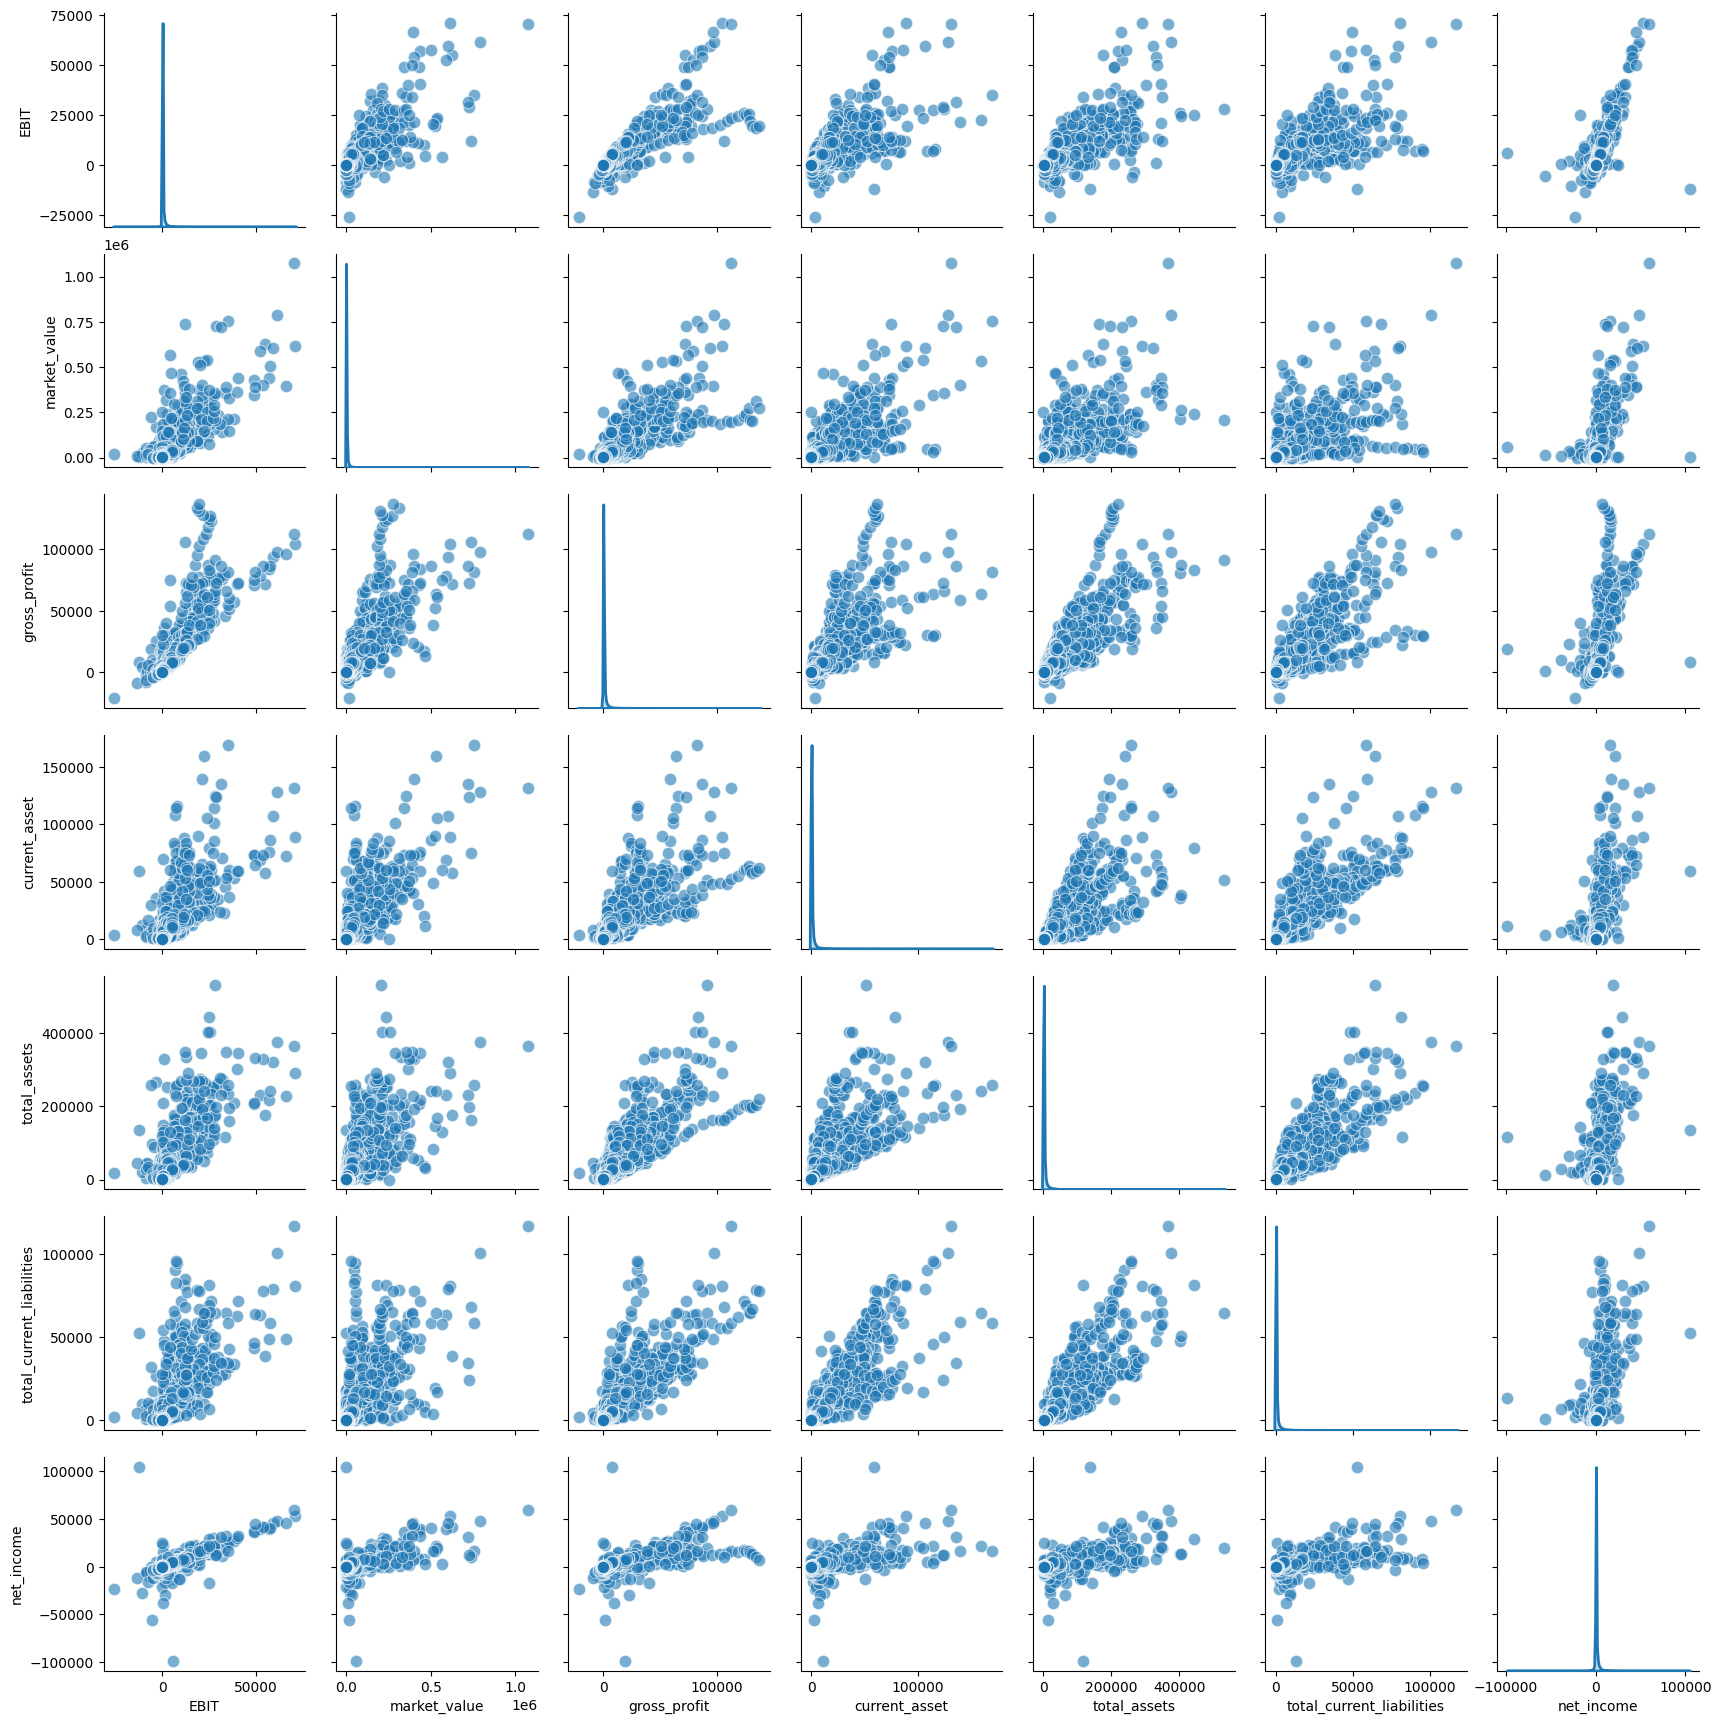

In [9]:
# Pick features + target
import matplotlib.pyplot as plt
import seaborn as sns

# Subset dataframe
df_plot = bankrupt_df[features + [target]]

# Create pairplot with larger fonts
sns.pairplot(df_plot, 
             diag_kind="kde",
             plot_kws={'alpha': 0.6, 's': 80},  # Scatter plot settings
             diag_kws={'linewidth': 2})         # Diagonal plot settings

# Increase font sizes for all labels
plt.rc('font', size=22)               # General font size
plt.rc('axes', titlesize=16)          # Axis title size
plt.rc('axes', labelsize=16)          # Axis label size
plt.rc('xtick', labelsize=14)         # X tick label size
plt.rc('ytick', labelsize=14)         # Y tick label size

plt.show()

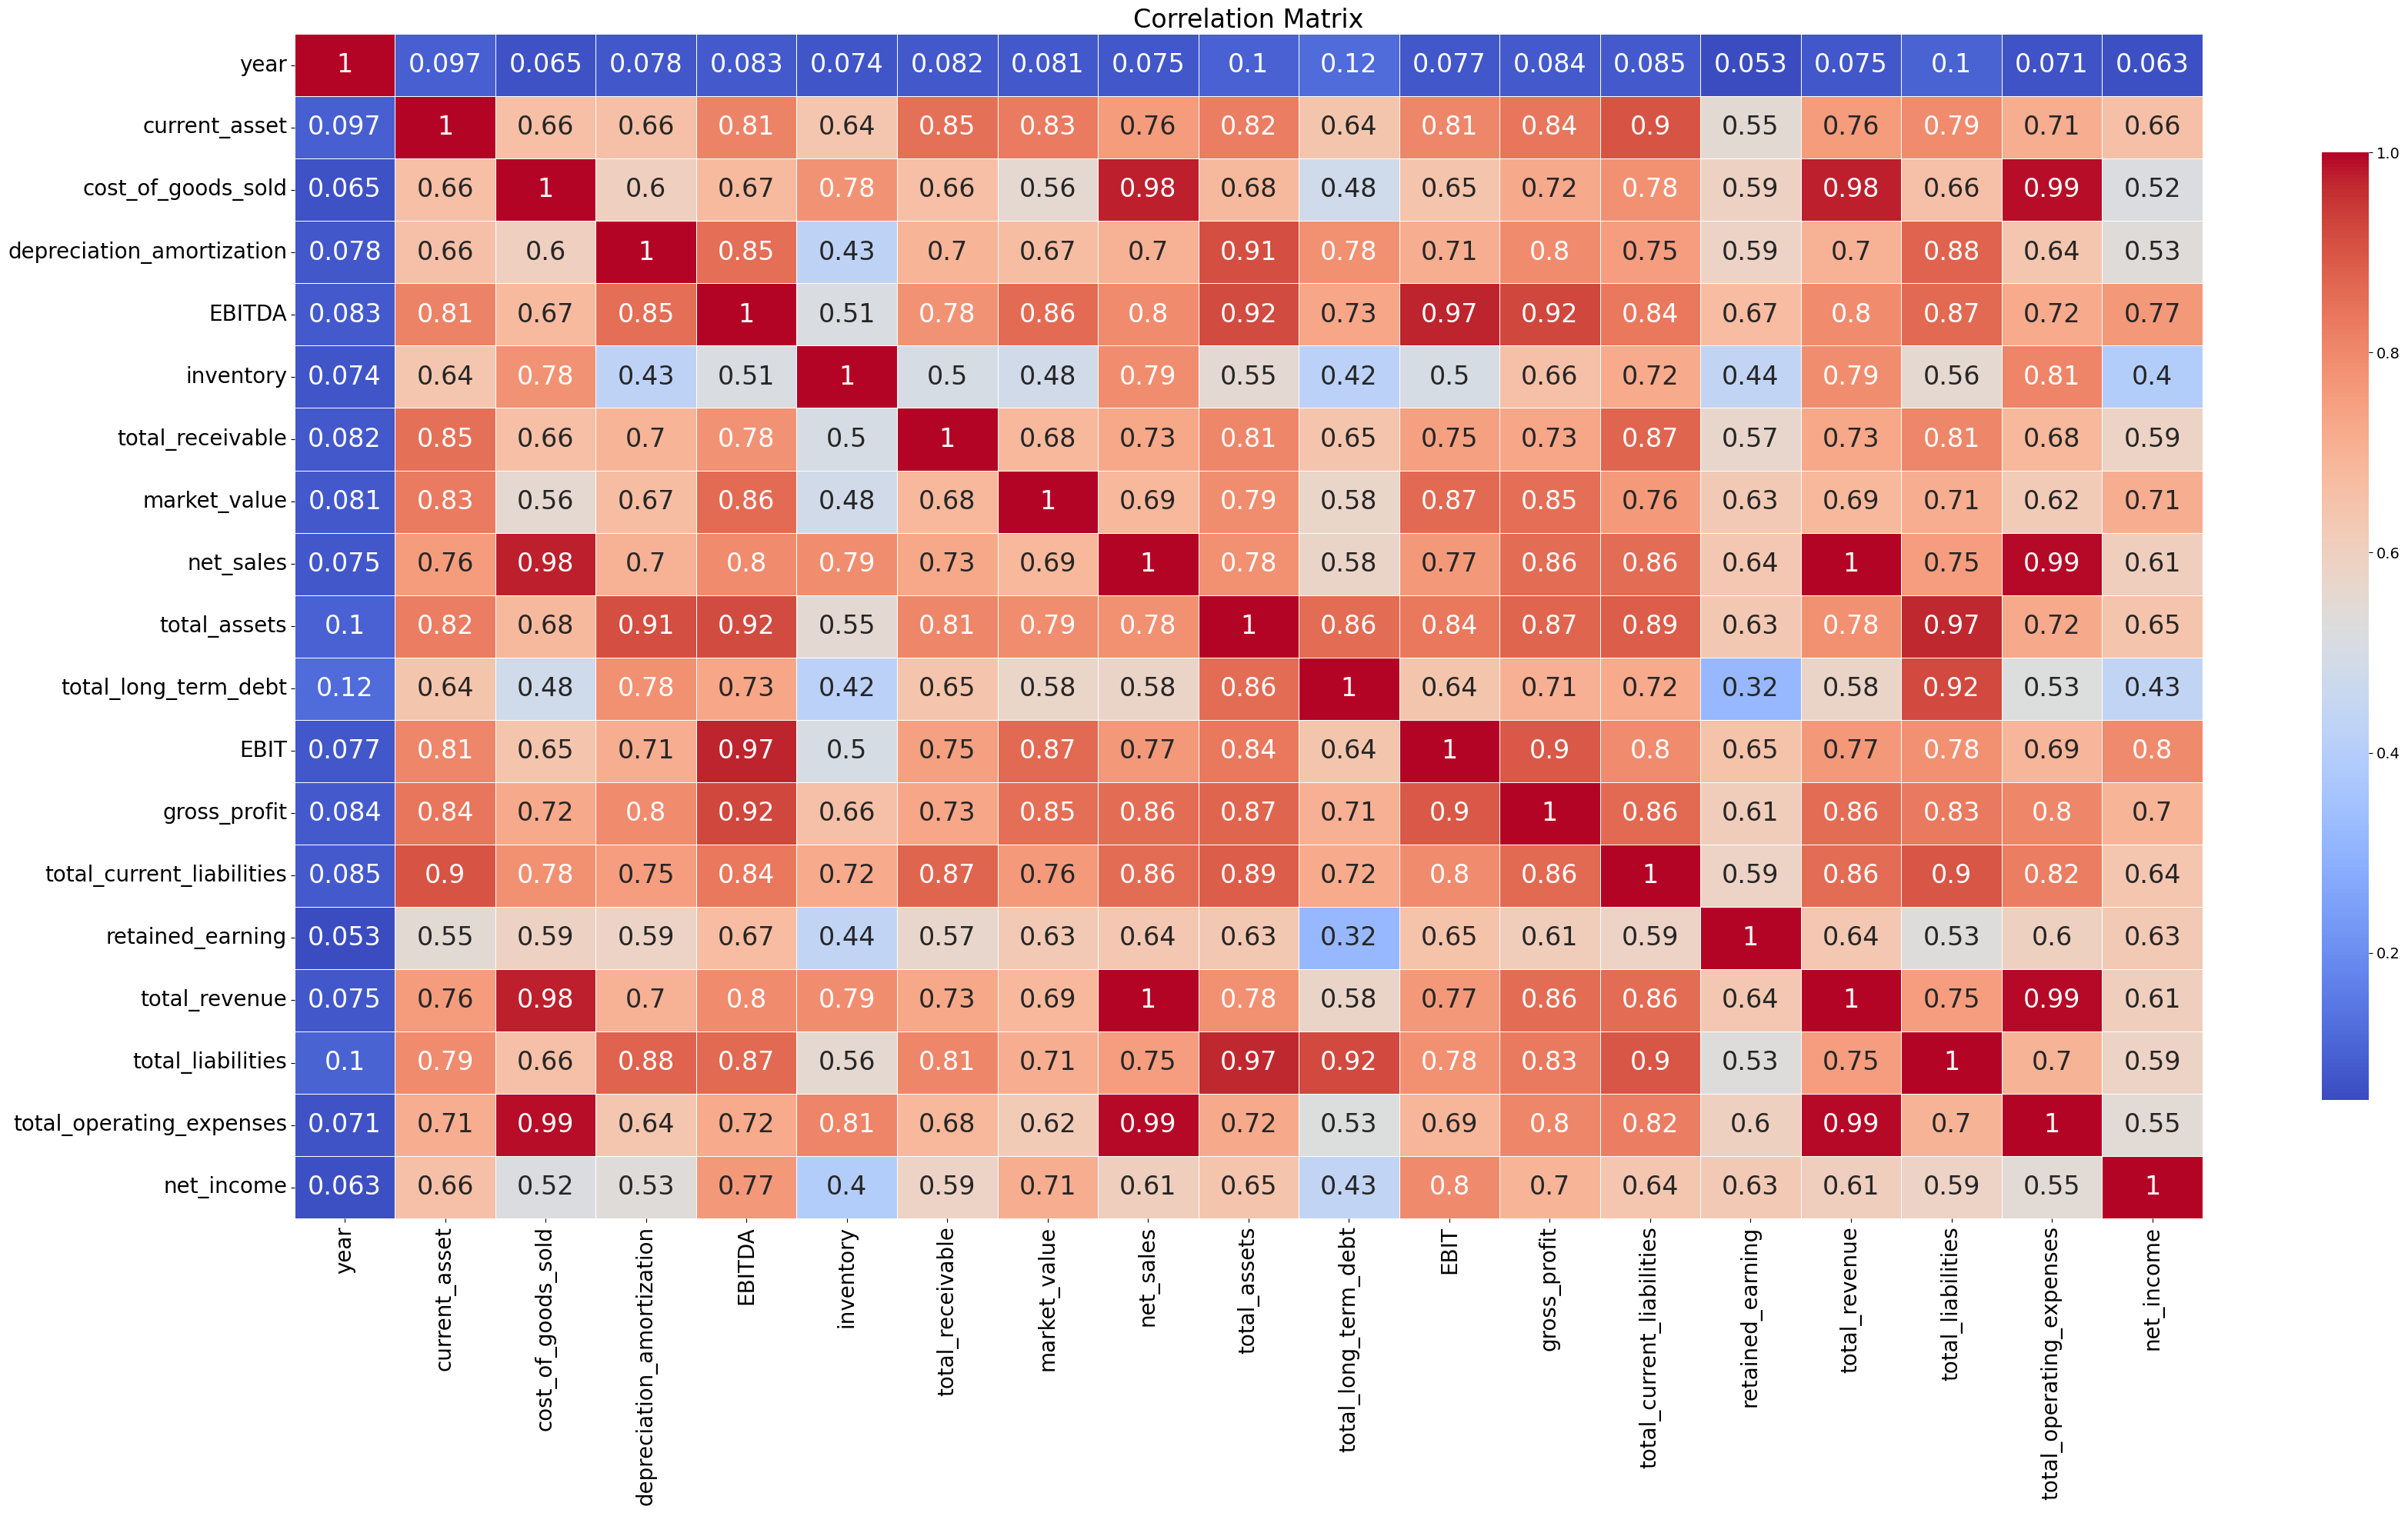

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

df_numeric = bankrupt_df[numeric]
plt.figure(figsize=(40,20))
corr = df_numeric.corr()

sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap='coolwarm',
            annot=True,
            linewidths=.5,
            annot_kws={"size": 24},        # Correlation number font size
            cbar_kws={"shrink": 0.8})      # Color bar size

# Increase tick label sizes - MAKE THESE BIGGER
plt.xticks(fontsize=20)                    # Changed from 12 to 20
plt.yticks(fontsize=20)                    # Changed from 12 to 20
plt.title('Correlation Matrix', fontsize=24)  # Made title bigger too
plt.show()

In [11]:
##########################################################

In [12]:
#############  this part is linear regression of net income ################

In [13]:
#### from scratch ######

In [14]:
import numpy as np
from sklearn.preprocessing import StandardScaler

use_df=bankrupt_df.copy()
X=use_df[['EBITDA']]
y=use_df['net_income']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


# 2. Train your model using scaled data
# Scale after splitting (important!)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Use your custom model
model = LinearRegressionFromScratch(learning_rate=0.01, n_iterations=1000)
model.fit(x_train_scaled, y_train)  # Train on scaled training data

# Predict on scaled test data
y_pred = model.predict(x_test_scaled)


In [15]:
#####sklearn single linear regression #####
y_pred

array([ -72.23543717,  -37.34538988,  -91.8347135 , ...,  -54.64321955,
        165.73056977, 6794.36389494], shape=(15737,))

In [16]:
################ from scratch for single linearregression #################
# print(y_pred[:10])
# print(y_test[:10])
print(type(y_pred))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [17]:
mse(y_test,y_pred)
mae(y_test,y_pred)
print(f'mse: {mse(y_test,y_pred)} || mae: {mae(y_test,y_pred)}')

mse: 413112.67271789134 || mae: 122.37623009781288


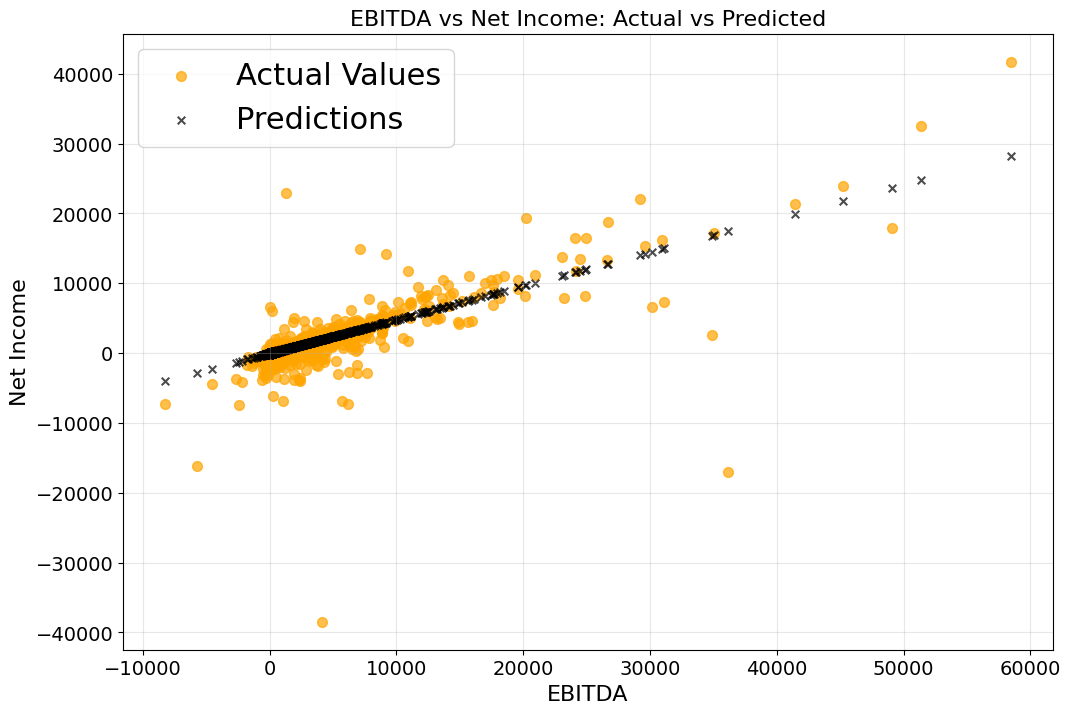

In [18]:
import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(12, 8))
amount=20000

plt.scatter(x_test['EBITDA'][:amount], y_test[:amount], color='orange', alpha=0.7, label='Actual Values', s=50)

# Add predictions to the same plot
plt.scatter(x_test['EBITDA'][:amount], y_pred[:amount], color='black', alpha=0.7, label='Predictions', s=30, marker='x')

plt.xlabel('EBITDA')
plt.ylabel('Net Income')
plt.title('EBITDA vs Net Income: Actual vs Predicted')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [19]:
SSR=((y_test-y_pred)**2).sum()
SST=((y_test-y_test.mean())**2).sum()

R2=1-(SSR/SST)
R2

np.float64(0.6214164134878282)

In [20]:

use_df=bankrupt_df.copy()
X=use_df[['EBITDA']]
y=use_df['net_income']


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

pipeline=Pipeline([
    ('scaler',StandardScaler()),
    ('classifier',LinearRegression())
                  
])

pipeline.fit(x_train,y_train)
y_pred_EBITDA=pipeline.predict(x_test)



In [21]:

print(y_pred_EBITDA[:10])
print(y_test[:10])






[ -72.2385558   -37.34700219  -91.83867829  -50.01589873  -49.32751362
  -58.033845    -54.62334151  236.83620843 1107.68640111  -27.36010047]
58332    -224.211
66075      17.297
77412     -85.155
57137      55.151
9134        5.243
62130      -7.640
68031      -1.607
59864    -181.037
9276     1338.694
27085      10.886
Name: net_income, dtype: float64


In [22]:
SSR=((y_test-y_pred_EBITDA)**2).sum()
SST=((y_test-y_test.mean())**2).sum()

R2=1-(SSR/SST)
R2

np.float64(0.6214153201457464)

In [23]:

print(f'mse: {mse(y_test,y_pred_EBITDA)} || mae: {mae(y_test,y_pred_EBITDA)}')

mse: 413113.8657793068 || mae: 122.37708889786032


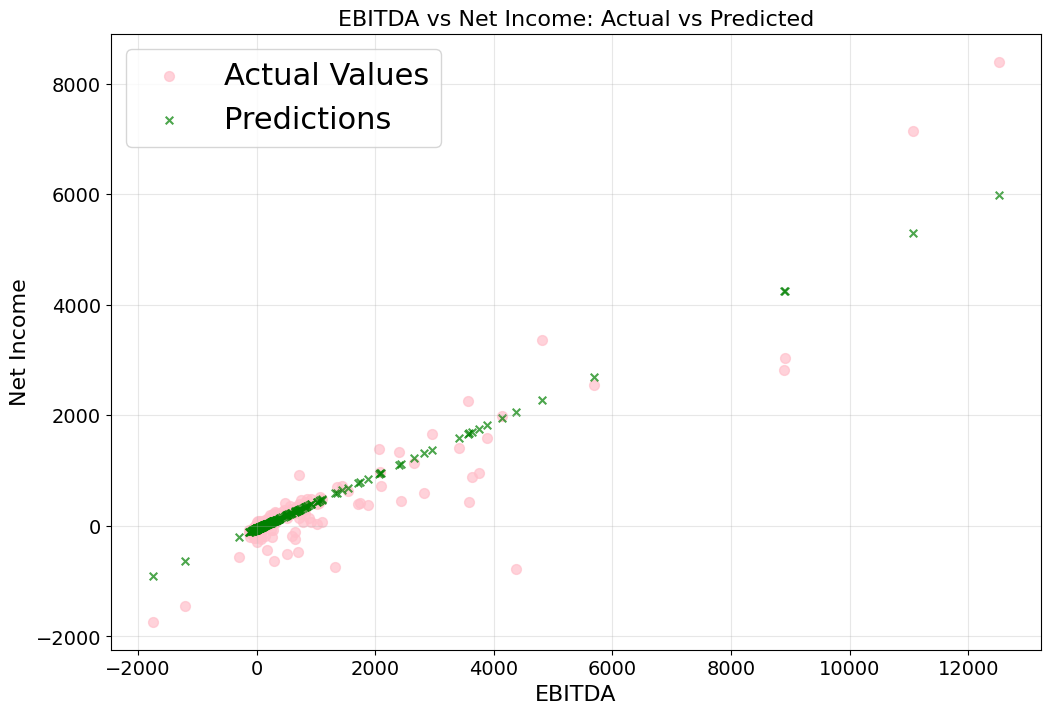

In [24]:
import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(12, 8))
amount=500

plt.scatter(x_test['EBITDA'][:amount], y_test[:amount], color='pink', alpha=0.7, label='Actual Values', s=50)

# Add predictions to the same plot
plt.scatter(x_test['EBITDA'][:amount], y_pred_EBITDA[:amount], color='green', alpha=0.7, label='Predictions', s=30, marker='x')

plt.xlabel('EBITDA')
plt.ylabel('Net Income')
plt.title('EBITDA vs Net Income: Actual vs Predicted')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [25]:
SSR=((y_test-y_pred_EBITDA)**2).sum()
SST=((y_test-y_test.mean())**2).sum()

R2=1-(SSR/SST)
R2


np.float64(0.6214153201457464)

In [26]:
use_df=bankrupt_df.copy()
X=use_df[['market_value']]
y=use_df['net_income']


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

pipeline=Pipeline([
    ('scaler',StandardScaler()),
    ('classifier',LinearRegression())
                  
])

pipeline.fit(x_train,y_train)
y_pred_MarketValue=pipeline.predict(x_test)

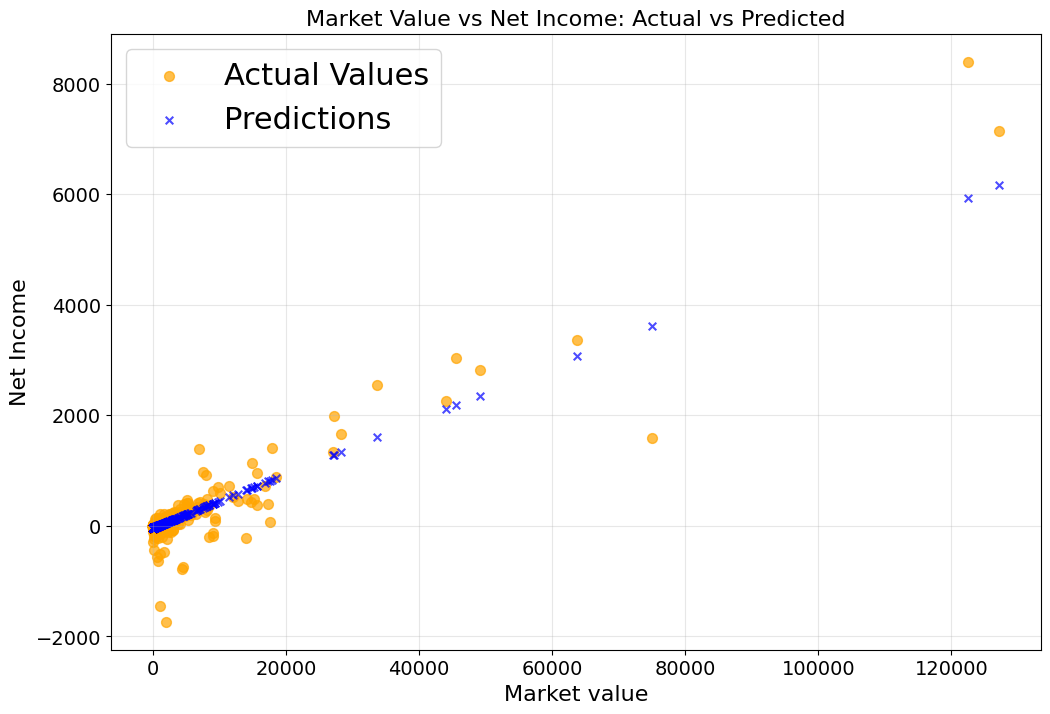

In [27]:
import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(12, 8))
amount=500

plt.scatter(x_test['market_value'][:amount], y_test[:amount], color='orange', alpha=0.7, label='Actual Values', s=50)

# Add predictions to the same plot
plt.scatter(x_test['market_value'][:amount], y_pred_MarketValue[:amount], color='blue', alpha=0.7, label='Predictions', s=30, marker='x')

plt.xlabel('Market value')
plt.ylabel('Net Income')
plt.title('Market Value vs Net Income: Actual vs Predicted')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [28]:
SSR=((y_test-y_pred_MarketValue)**2).sum()
SST=((y_test-y_test.mean())**2).sum()

R2=1-(SSR/SST)
R2

np.float64(0.6009088104331461)

In [29]:

print(f'mse: {mse(y_test,y_pred_MarketValue)} || mae: {mae(y_test,y_pred_MarketValue)}')

mse: 435490.6917625307 || mae: 128.1138668137042


In [30]:
print(y_pred_MarketValue[:10])
################ from scratch for single linearregression #################
print(y_test[:10])

[  -2.29474691   23.19616407  -24.02071303   -8.23154154  -35.86929843
  -32.85950996  -38.56314328  400.58649431 1281.69264112   -2.36783285]
58332    -224.211
66075      17.297
77412     -85.155
57137      55.151
9134        5.243
62130      -7.640
68031      -1.607
59864    -181.037
9276     1338.694
27085      10.886
Name: net_income, dtype: float64


In [31]:
use_df=bankrupt_df.copy()
X=use_df[['gross_profit']]
y=use_df['net_income']


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

pipeline=Pipeline([
    ('scaler',StandardScaler()),
    ('classifier',LinearRegression())
                  
])

pipeline.fit(x_train,y_train)
y_pred_EBITDA=pipeline.predict(x_test)

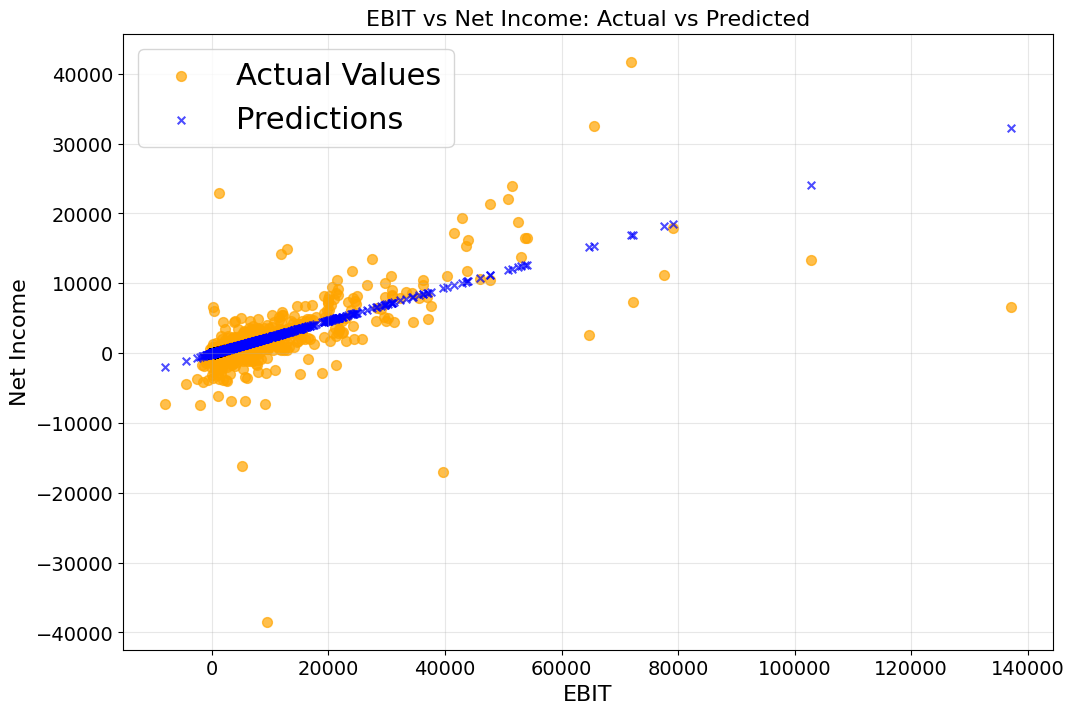

In [32]:
import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(12, 8))
amount=50000

plt.scatter(x_test['gross_profit'][:amount], y_test[:amount], color='orange', alpha=0.7, label='Actual Values', s=50)

# Add predictions to the same plot
plt.scatter(x_test['gross_profit'][:amount], y_pred_EBITDA[:amount], color='blue', alpha=0.7, label='Predictions', s=30, marker='x')

plt.xlabel('EBIT')
plt.ylabel('Net Income')
plt.title('EBIT vs Net Income: Actual vs Predicted')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [33]:
SSR=((y_test-y_pred_EBITDA)**2).sum()
SST=((y_test-y_test.mean())**2).sum()

R2=1-(SSR/SST)
R2

np.float64(0.5084614142751)

In [34]:

print(f'mse: {mse(y_test,y_pred_EBITDA)} || mae: {mae(y_test,y_pred_EBITDA)}')

mse: 536369.8430868373 || mae: 140.76136158549915


In [35]:
# subplot of linear regression




In [36]:
##########################################################

In [37]:
#############  this part is multiple linear regression of net income ################

In [38]:
##########################################################

In [39]:
bankrupt_df.columns

Index(['company_name', 'status_label', 'year', 'current_asset',
       'cost_of_goods_sold', 'depreciation_amortization', 'EBITDA',
       'inventory', 'net_income', 'total_receivable', 'market_value',
       'net_sales', 'total_assets', 'total_long_term_debt', 'EBIT',
       'gross_profit', 'total_current_liabilities', 'retained_earning',
       'total_revenue', 'total_liabilities', 'total_operating_expenses'],
      dtype='object')

In [40]:
bankrupt_df.shape

(78682, 21)

In [41]:
bankrupt_df.dtypes

company_name                  object
status_label                  object
year                           int64
current_asset                float64
cost_of_goods_sold           float64
depreciation_amortization    float64
EBITDA                       float64
inventory                    float64
net_income                   float64
total_receivable             float64
market_value                 float64
net_sales                    float64
total_assets                 float64
total_long_term_debt         float64
EBIT                         float64
gross_profit                 float64
total_current_liabilities    float64
retained_earning             float64
total_revenue                float64
total_liabilities            float64
total_operating_expenses     float64
dtype: object

In [42]:
use_df=bankrupt_df.copy()
X=use_df[features]
y=use_df[target]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)



In [43]:
model=linear_model.LinearRegression()
model.fit(x_train,y_train)

predict=model.predict(x_test)
print(predict[:10])

[-194.79756678  -15.15290228  -89.91011729  -44.99965076  -35.35305459
  -46.09936075  -39.91473052   97.17445015 1386.01319433   -5.62808002]


In [44]:
y_test[:10]

58332    -224.211
66075      17.297
77412     -85.155
57137      55.151
9134        5.243
62130      -7.640
68031      -1.607
59864    -181.037
9276     1338.694
27085      10.886
Name: net_income, dtype: float64

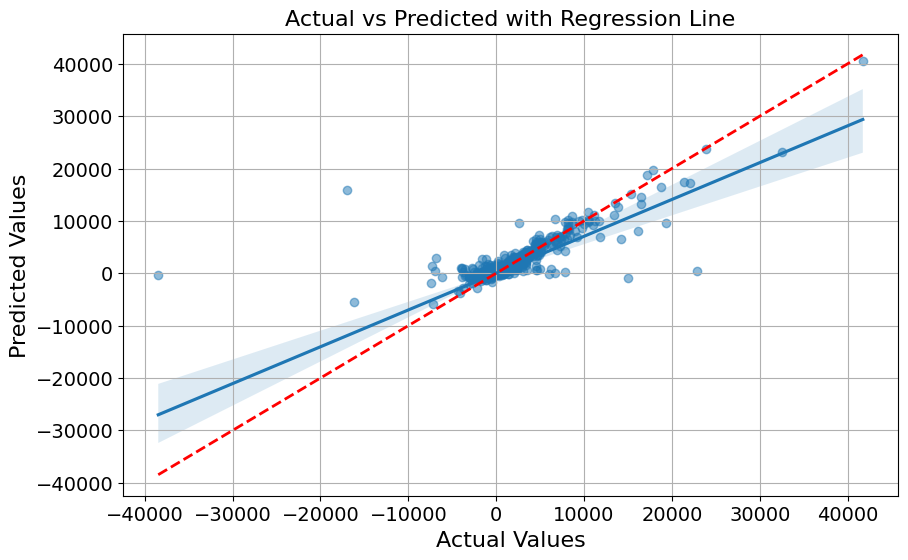

In [45]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=predict, scatter_kws={'alpha':0.5})
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted with Regression Line')
plt.grid(True)
plt.show()

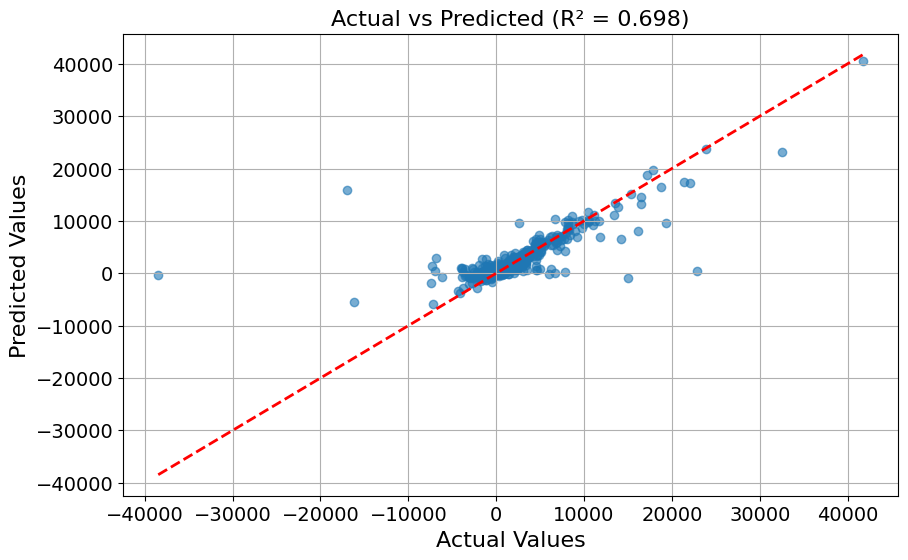

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

# Get predictions


# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predict, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs Predicted (R² = {r2_score(y_test, predict):.3f})')
plt.grid(True)
plt.show()

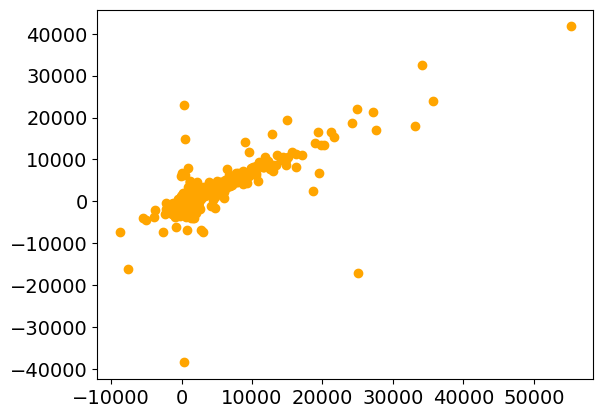

In [47]:
import matplotlib.pyplot as plt

plt.scatter(x_test['EBIT'],y_test,color='orange')

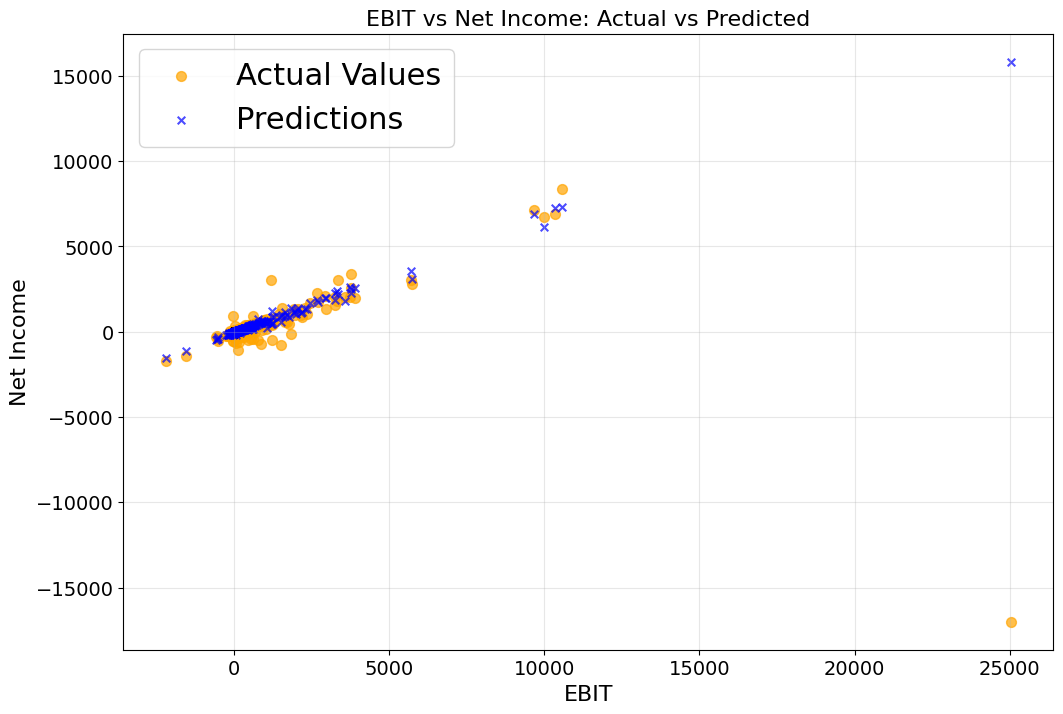

In [48]:
import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(12, 8))
amount=1000
plt.scatter(x_test['EBIT'][:amount], y_test[:amount], color='orange', alpha=0.7, label='Actual Values', s=50)

# Add predictions to the same plot
plt.scatter(x_test['EBIT'][:amount], predict[:amount], color='blue', alpha=0.7, label='Predictions', s=30, marker='x')

plt.xlabel('EBIT')
plt.ylabel('Net Income')
plt.title('EBIT vs Net Income: Actual vs Predicted')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

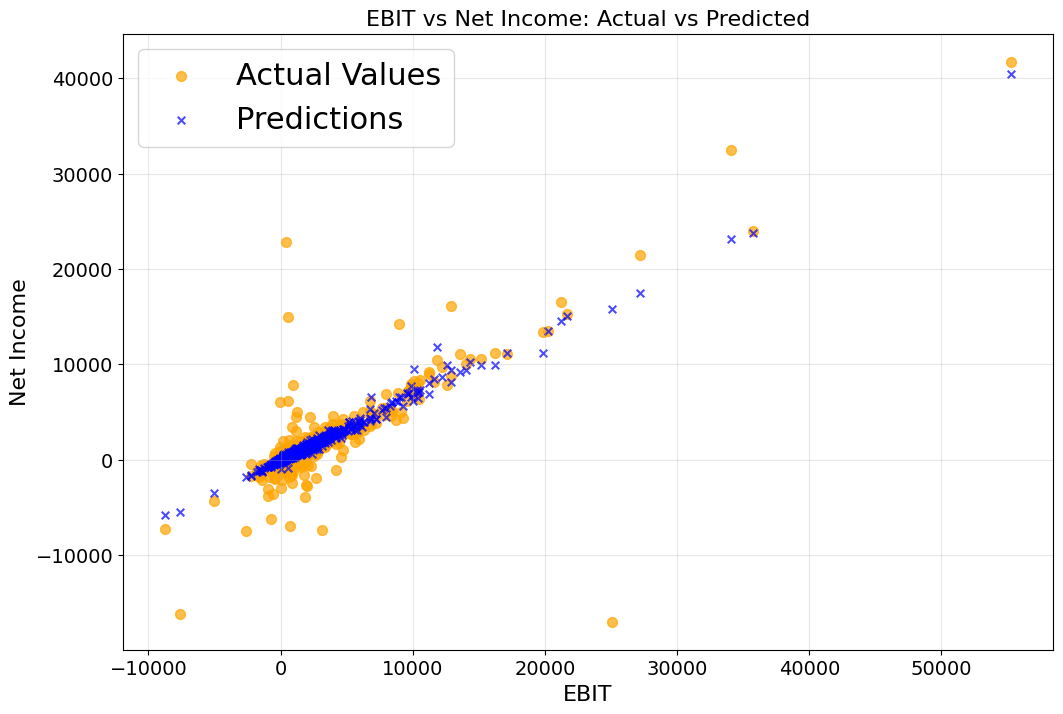

In [49]:
import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(12, 8))
amount=10000
plt.scatter(x_test['EBIT'][:amount], y_test[:amount], color='orange', alpha=0.7, label='Actual Values', s=50)

# Add predictions to the same plot
plt.scatter(x_test['EBIT'][:amount], predict[:amount], color='blue', alpha=0.7, label='Predictions', s=30, marker='x')

plt.xlabel('EBIT')
plt.ylabel('Net Income')
plt.title('EBIT vs Net Income: Actual vs Predicted')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [50]:
SSR=((y_test-predict)**2).sum()
SST=((y_test-y_test.mean())**2).sum()

R2=1-(SSR/SST)
R2

np.float64(0.6983140813454166)

In [51]:

print(f'mse: {mse(y_test,predict)} || mae: {mae(y_test,predict)}')

mse: 329201.4778689839 || mae: 93.88122417593932


In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Example: assume you already have your dataset loaded
# X = features, y = target (net income)
# X = df.drop("NetIncome", axis=1)
# y = df["NetIncome"]

# Split data

# X=use_df[features]
X=use_df[features]
y=use_df[target]


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# ------------------------------
# 1. Plain Multiple Linear Regression
# ------------------------------
lr = make_pipeline(StandardScaler(), LinearRegression())
lr.fit(x_train, y_train)
print("Linear Regression R^2:", lr.score(x_test, y_test))

# ------------------------------
# 2. Ridge Regression
# ------------------------------
ridge = make_pipeline(StandardScaler(), Ridge(alpha=1.0))  # alpha = regularization strength
ridge.fit(x_train, y_train)
print("Ridge R^2:", ridge.score(x_test, y_test))

# ------------------------------
# 3. Lasso Regression
# ------------------------------
lasso = make_pipeline(StandardScaler(), Lasso(alpha=0.1))  # smaller alpha = less shrinkage
lasso.fit(x_train, y_train)
print("Lasso R^2:", lasso.score(x_test, y_test))

# ------------------------------

# 4. Elastic Net (optional)
# ------------------------------
elastic = make_pipeline(StandardScaler(), ElasticNet(alpha=0.1, l1_ratio=0.5))
elastic.fit(x_train, y_train)
print("ElasticNet R^2:", elastic.score(x_test, y_test))


Linear Regression R^2: 0.6983140813454166
Ridge R^2: 0.6983177418211879
Lasso R^2: 0.6983281224268287
ElasticNet R^2: 0.6971379449451134


In [55]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# X = features, y = target
X = use_df[numeric_features]
y = use_df[target]

# ------------------------------
# Ridge Regression
# ------------------------------
ridge = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
ridge.fit(X, y)

ridge_coefs = ridge.named_steps['ridge'].coef_

# ------------------------------
# Lasso Regression
# ------------------------------
lasso = make_pipeline(StandardScaler(), Lasso(alpha=0.1))
lasso.fit(X, y)

lasso_coefs = lasso.named_steps['lasso'].coef_

# ------------------------------
# Compare coefficients
# ------------------------------
coef_df = pd.DataFrame({
    "Feature": numeric_features,
    "Ridge": ridge_coefs,
    "Lasso": lasso_coefs
})

print(coef_df.sort_values("Lasso", key=abs, ascending=False).head(len(numeric_features)))


                      Feature       Ridge       Lasso
4                      EBITDA  398.414303  610.407251
13              total_revenue    4.504319 -479.015257
9                        EBIT  631.822428  471.528139
2          cost_of_goods_sold   35.467858  373.378999
3   depreciation_amortization -219.412560 -289.847630
12           retained_earning  270.019871  269.388259
11  total_current_liabilities  182.648729  190.669085
5            total_receivable -182.213462 -179.815337
14          total_liabilities  191.175681  168.040749
1               current_asset  164.801565  159.792096
16       total_long_term_debt -152.533037 -145.787565
8                total_assets -128.988917 -114.791954
17                  inventory -106.363323 -105.533530
15   total_operating_expenses  -71.574268  -92.817921
10               gross_profit  -70.076748   72.834212
7                   net_sales    4.504319   58.198907
6                market_value   22.829228   22.010895
0                        yea

c:\Users\kinga\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.711e+09, tolerance: 1.260e+07
  model = cd_fast.enet_coordinate_descent(


In [ ]:
use_df=bankrupt_df.copy()
X=use_df[more_5_features]
y=use_df['net_income']


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

pipeline=Pipeline([
    ('scaler',StandardScaler()),
    ('classifier',LinearRegression())
                  
])

pipeline.fit(x_train,y_train)
y_pred=pipeline.predict(x_test)

SSR=((y_test-y_pred)**2).sum()
SST=((y_test-y_test.mean())**2).sum()

R2=1-(SSR/SST)
R2

np.float64(0.720533342496195)

In [ ]:

print(f'mse: {mse(y_test,y_pred)} || mae: {mae(y_test,y_pred)}')  

mse: 304955.6872778491 || mae: 86.0125805268605


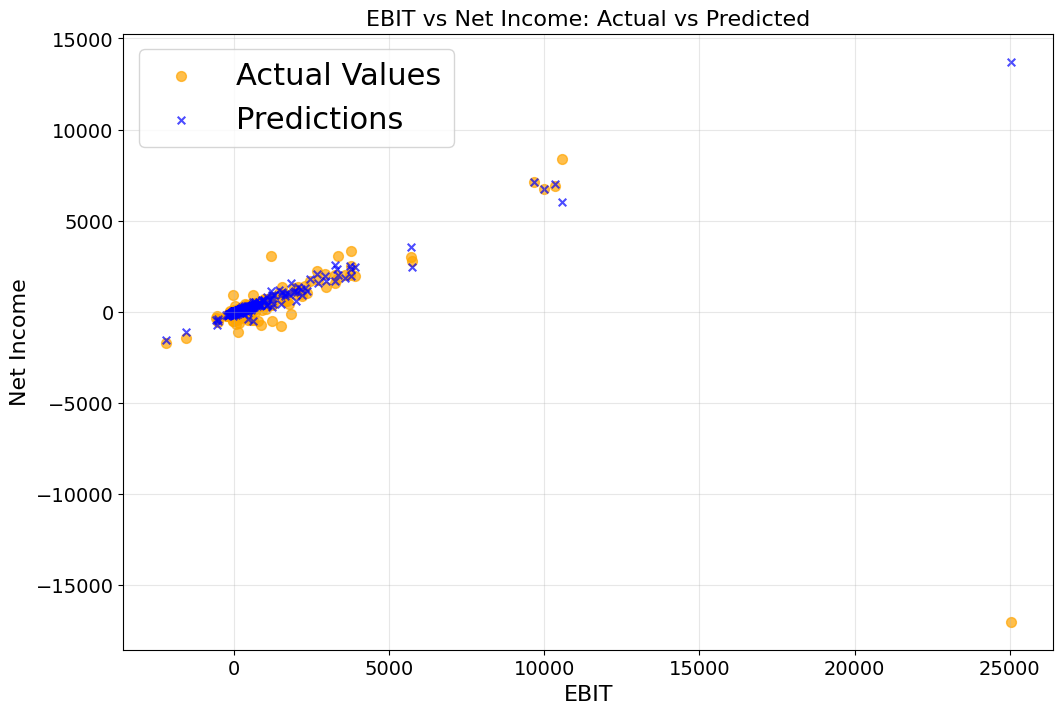

In [ ]:
import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(12, 8))
amount=1000
plt.scatter(x_test['EBIT'][:amount], y_test[:amount], color='orange', alpha=0.7, label='Actual Values', s=50)

# Add predictions to the same plot
plt.scatter(x_test['EBIT'][:amount], y_pred[:amount], color='blue', alpha=0.7, label='Predictions', s=30, marker='x')

plt.xlabel('EBIT')
plt.ylabel('Net Income')
plt.title('EBIT vs Net Income: Actual vs Predicted')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
##########this part is polynomial regression of net_income ##############

In [ ]:
############### single polynomial regression

In [ ]:

############### multiple polynomial regression
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, SplineTransformer
# X=use_df[features]
y=use_df[target]

X=use_df[['EBIT']]
# X=use_df[features]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


degree=2
model = make_pipeline(StandardScaler(),PolynomialFeatures(degree),LinearRegression())
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

print(y_pred)


[-154.56518458  -11.45845993  -77.41381759 ...  -30.67203268  145.02180148
 6566.06478371]


In [ ]:
y_test

58332    -224.211
66075      17.297
77412     -85.155
57137      55.151
9134        5.243
           ...   
6939        1.809
11833       4.355
54981      -0.721
48107     237.879
14018    6771.000
Name: net_income, Length: 15737, dtype: float64

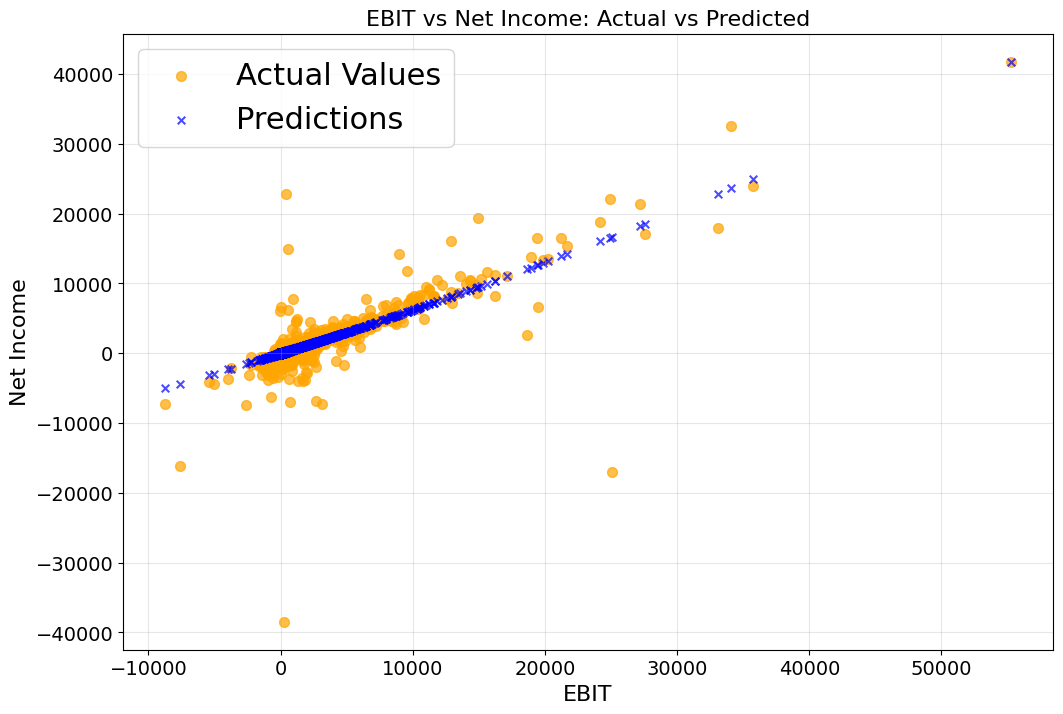

In [ ]:
import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(12, 8))
amount=50000

plt.scatter(x_test['EBIT'][:amount], y_test[:amount], color='orange', alpha=0.7, label='Actual Values', s=50)

# Add predictions to the same plot
plt.scatter(x_test['EBIT'][:amount], y_pred[:amount], color='blue', alpha=0.7, label='Predictions', s=30, marker='x')

plt.xlabel('EBIT')
plt.ylabel('Net Income')
plt.title('EBIT vs Net Income: Actual vs Predicted')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
SSR=((y_test-y_pred)**2).sum()
SST=((y_test-y_test.mean())**2).sum()

R2=1-(SSR/SST)
R2

np.float64(0.683918944951805)

In [ ]:

print(f'mse: {mse(y_test,y_pred)} || mae: {mae(y_test,y_pred)}')

mse: 344909.53675365576 || mae: 90.28936027417782


In [ ]:
print(y_pred[:10])
################ from scratch for single linearregression #################
print(y_test[:10])

[-154.56518458  -11.45845993  -77.41381759  -35.81476524  -25.06928873
  -35.65785489  -30.64953039   84.64761451 1209.61673213   -1.7127629 ]
58332    -224.211
66075      17.297
77412     -85.155
57137      55.151
9134        5.243
62130      -7.640
68031      -1.607
59864    -181.037
9276     1338.694
27085      10.886
Name: net_income, dtype: float64


In [ ]:

############### multiple polynomial regression
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, SplineTransformer
X=use_df[features]
y=use_df[target]

# X=use_df[['EBIT']]
X=use_df[features]
# X=use_df[more_5_features]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


degree=2
model = make_pipeline(StandardScaler(),PolynomialFeatures(degree),LinearRegression())
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

print(y_pred)





[-2.27680257e+02  1.15848538e+01 -6.25175335e+01 ... -5.09402136e+00
  1.35697626e+02  8.04365094e+03]


In [ ]:
y_test

58332    -224.211
66075      17.297
77412     -85.155
57137      55.151
9134        5.243
           ...   
6939        1.809
11833       4.355
54981      -0.721
48107     237.879
14018    6771.000
Name: net_income, Length: 15737, dtype: float64

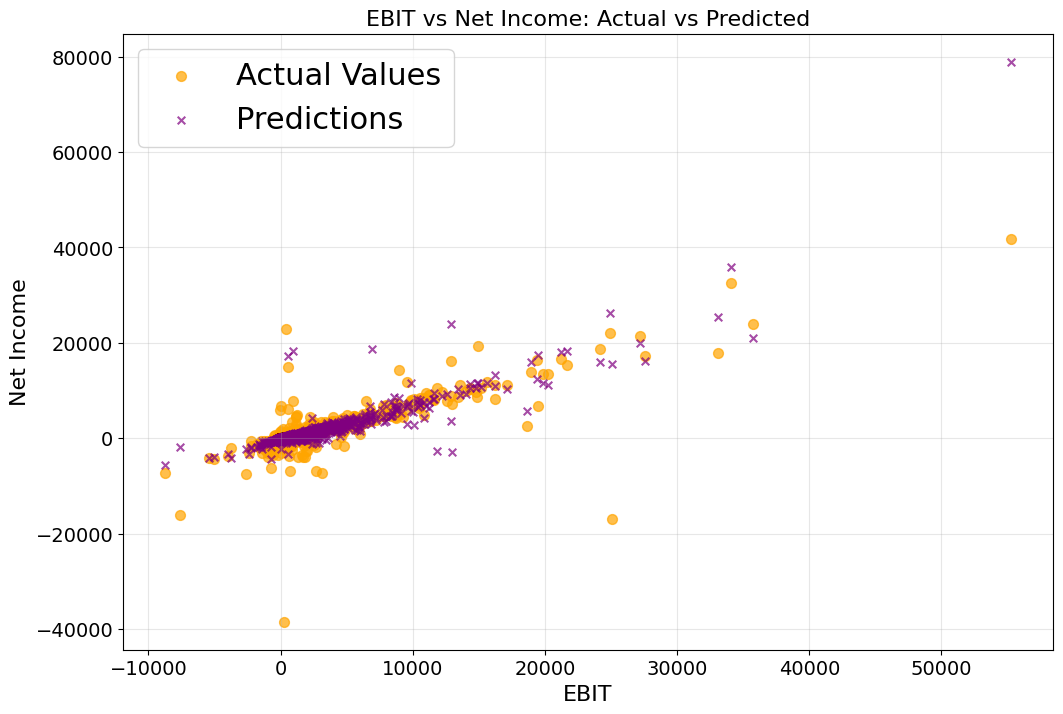

In [ ]:
import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(12, 8))
amount=50000

plt.scatter(x_test['EBIT'][:amount], y_test[:amount], color='orange', alpha=0.7, label='Actual Values', s=50)

# Add predictions to the same plot
plt.scatter(x_test['EBIT'][:amount], y_pred[:amount], color='purple', alpha=0.7, label='Predictions', s=30, marker='x')

plt.xlabel('EBIT')
plt.ylabel('Net Income')
plt.title('EBIT vs Net Income: Actual vs Predicted')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
SSR=((y_test-y_pred)**2).sum()
SST=((y_test-y_test.mean())**2).sum()

R2=1-(SSR/SST)
R2

np.float64(0.5692456867830914)

In [ ]:

print(f'mse: {mse(y_test,y_pred)} || mae: {mae(y_test,y_pred)}')

mse: 470041.6815668672 || mae: 86.38051367099386


In [ ]:
print(y_pred[:10])
################ from scratch for single linearregression #################
print(y_test[:10])

[-2.27680257e+02  1.15848538e+01 -6.25175335e+01 -2.33478663e+01
  5.28043854e-01 -1.37367449e+01 -5.75422635e+00 -6.29993578e+01
  1.45392362e+03  2.78896137e+01]
58332    -224.211
66075      17.297
77412     -85.155
57137      55.151
9134        5.243
62130      -7.640
68031      -1.607
59864    -181.037
9276     1338.694
27085      10.886
Name: net_income, dtype: float64
